# Chapter 16: Matplotlib

**Matplotlib** is a powerful toolbox for 2D plotting and to some extent 3D plotting, see: [https://matplotlib.org/](https://matplotlib.org/).  This chapter shows a couple examples of how to create figures with subplots as well as how to plot points on images.

For installation, see [Chapter 13](Chapter_13_Numpy.ipynb).

## Plotting 2D Points
It is straightforward to create figures with multiple subplots and plot points in each.  Let's create some points in a circle to use for plotting.  Notice how `np.cos()` and `np.sin()` operate on each element of an array and return an array: 

In [29]:
import numpy as np
r = 20
theta = np.linspace(0,2*np.pi,25)   # 1D array of 25 equal-spaced numbers from 0 to 2*pi inclusive
x = r*np.cos(theta)                 # 1D array of r*cos(theta)
y = r*np.sin(theta)                 # 1D array of r*sin(theta)

Now create a figure with 2 subplots

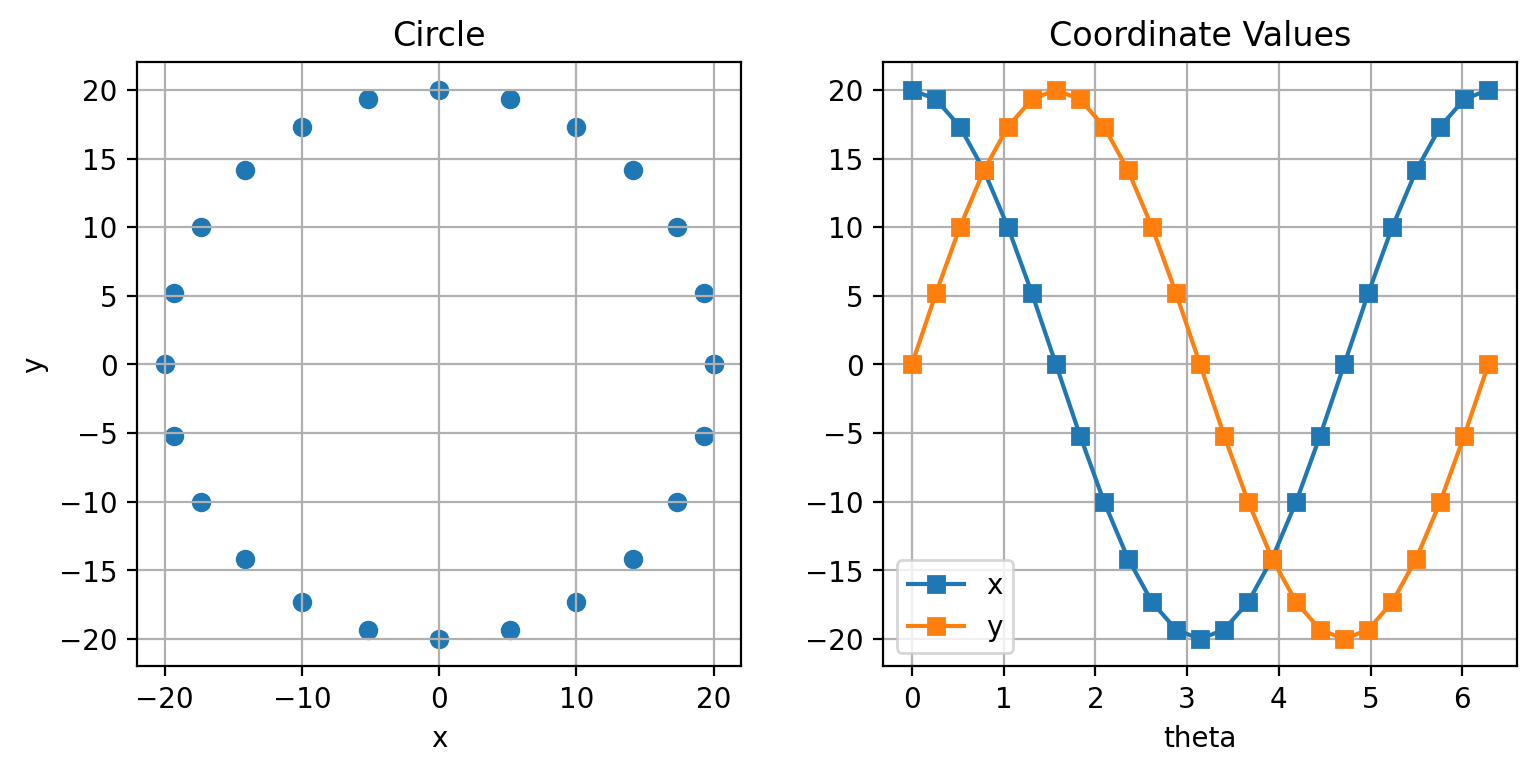

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,4),dpi=200)
ax0 = fig.add_subplot(1,2,1)    # Grid of 1 x 2 subplots, and create subplot 1
plt.scatter(x,y,marker='o')
ax0.set_aspect('equal','box')   # Equal aspect ratio with boundary
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('Circle')
plt.grid()
ax1 = fig.add_subplot(1,2,2)    # Grid of 1 x 2 subplots, and create subplot 2
plt.plot(theta,x,'-',marker='s',label='x')
plt.plot(theta,y,'-',marker='s',label='y')
ax1.set_xlabel('theta')
ax1.set_title('Coordinate Values')
plt.legend()                    # Uses label values
plt.grid()
plt.show()  # Draw the plot and wait until window is closed -- needed when run in terminal

The figure can be saved as a png with a transparent background using a command like the below.  

In [21]:
fig.savefig('Output/circle_plots.png', transparent=True)

After you run this have a look for this saved image in the `Output` folder.

Note the command: `plt.show()`.  While not needed for Jupyter notebooks, when code is running in a terminal this tells Python to render all the created figures and then halt the program flow until the user to dimisses the figures.  To render the figures without stopping flow of the code, use: `plt.show(block=False)`.  

## Plotting on Images
We can use OpenCV to read in images as in [Chapter 15](Chapter_15_OpenCV.ipynb): 

In [1]:
import cv2 as cv
img = cv.imread('.Images/book.png', -1)

This image will be in BGR (blue-green-red) format, whereas Matplotlib assumes RGB (red-green-blue) format.  We can convert it as follows:

In [2]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

## Plotting with Matplotlib
Matplotlib can plot shapes on separate layers on top of an image without modifying the image.  Here's an example adding a semi-translucent rectangle and a circle:

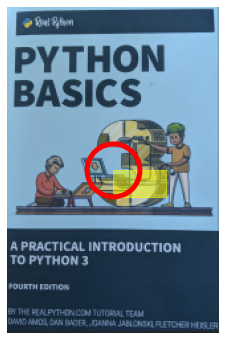

In [60]:
fig = plt.figure(figsize=(4,6), num='Matplotlib imshow')
ax = fig.add_subplot(1,1,1) 
plt.imshow(img_rgb)
img_cen_xy = (img_rgb.shape[1]/2,img_rgb.shape[0]/2)   # floating point coordinates are fine

# Create a solid translucent rectangle with top-left corner at center of image
my_rect = plt.Rectangle( img_cen_xy, width=40, height=20, alpha=0.5, color='yellow')
ax.add_artist(my_rect)

# Create a circle with center at the image center
my_circle = plt.Circle(img_cen_xy, 20, fill=False, linestyle='-', color='red', linewidth=5)
ax.add_artist(my_circle)

ax.axis('off')
plt.show()

Now let's make a plot of the gradient as calculated in Chapter 15.  First re-calculate the x image gradient:

In [4]:
import numpy as np
imgf_gray = cv.cvtColor((img/255).astype(np.float32), cv.COLOR_BGR2GRAY) # Requires 32-bit float image
imgf_grad_x = cv.Sobel(imgf_gray, cv.CV_32F, 1, 0, ksize=5)

Now plot the gradient along with a colorbar showing the gradient magnitude and sign:

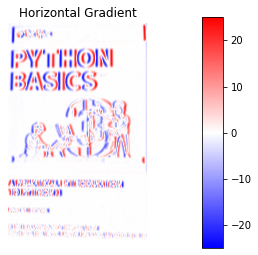

In [28]:
fig = plt.figure(num='Image Gradient')       # Create a figure names "Image Gradient"
ax = fig.add_subplot(1,1,1)                  # Single subplot
pcm = ax.imshow(imgf_grad_x, cmap='bwr', vmax=25, vmin=-25 )     # Show gradient with a blue-white-red colormap
ax.axis('off')
plt.title('Horizontal Gradient')
cbax = fig.add_axes([0.8, 0.1, 0.05, 0.8])   # Add an axes at location (0.8, 0.1) for our colorbar
plt.colorbar(pcm, cax=cbax)                  
plt.show()                                   # Render the plot

___
### [Outline](README.md), Next: [Chapter 17: Linear Equations](Chapter_17_Linear_Equations.ipynb)